In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import techniques

In [8]:
boston_house = pd.read_csv("boston.csv")
boston_house

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = boston_house.loc[:,column_sels]
y = boston_house['MEDV']
x = pd.DataFrame(data=scaler.fit_transform(x), columns=column_sels)

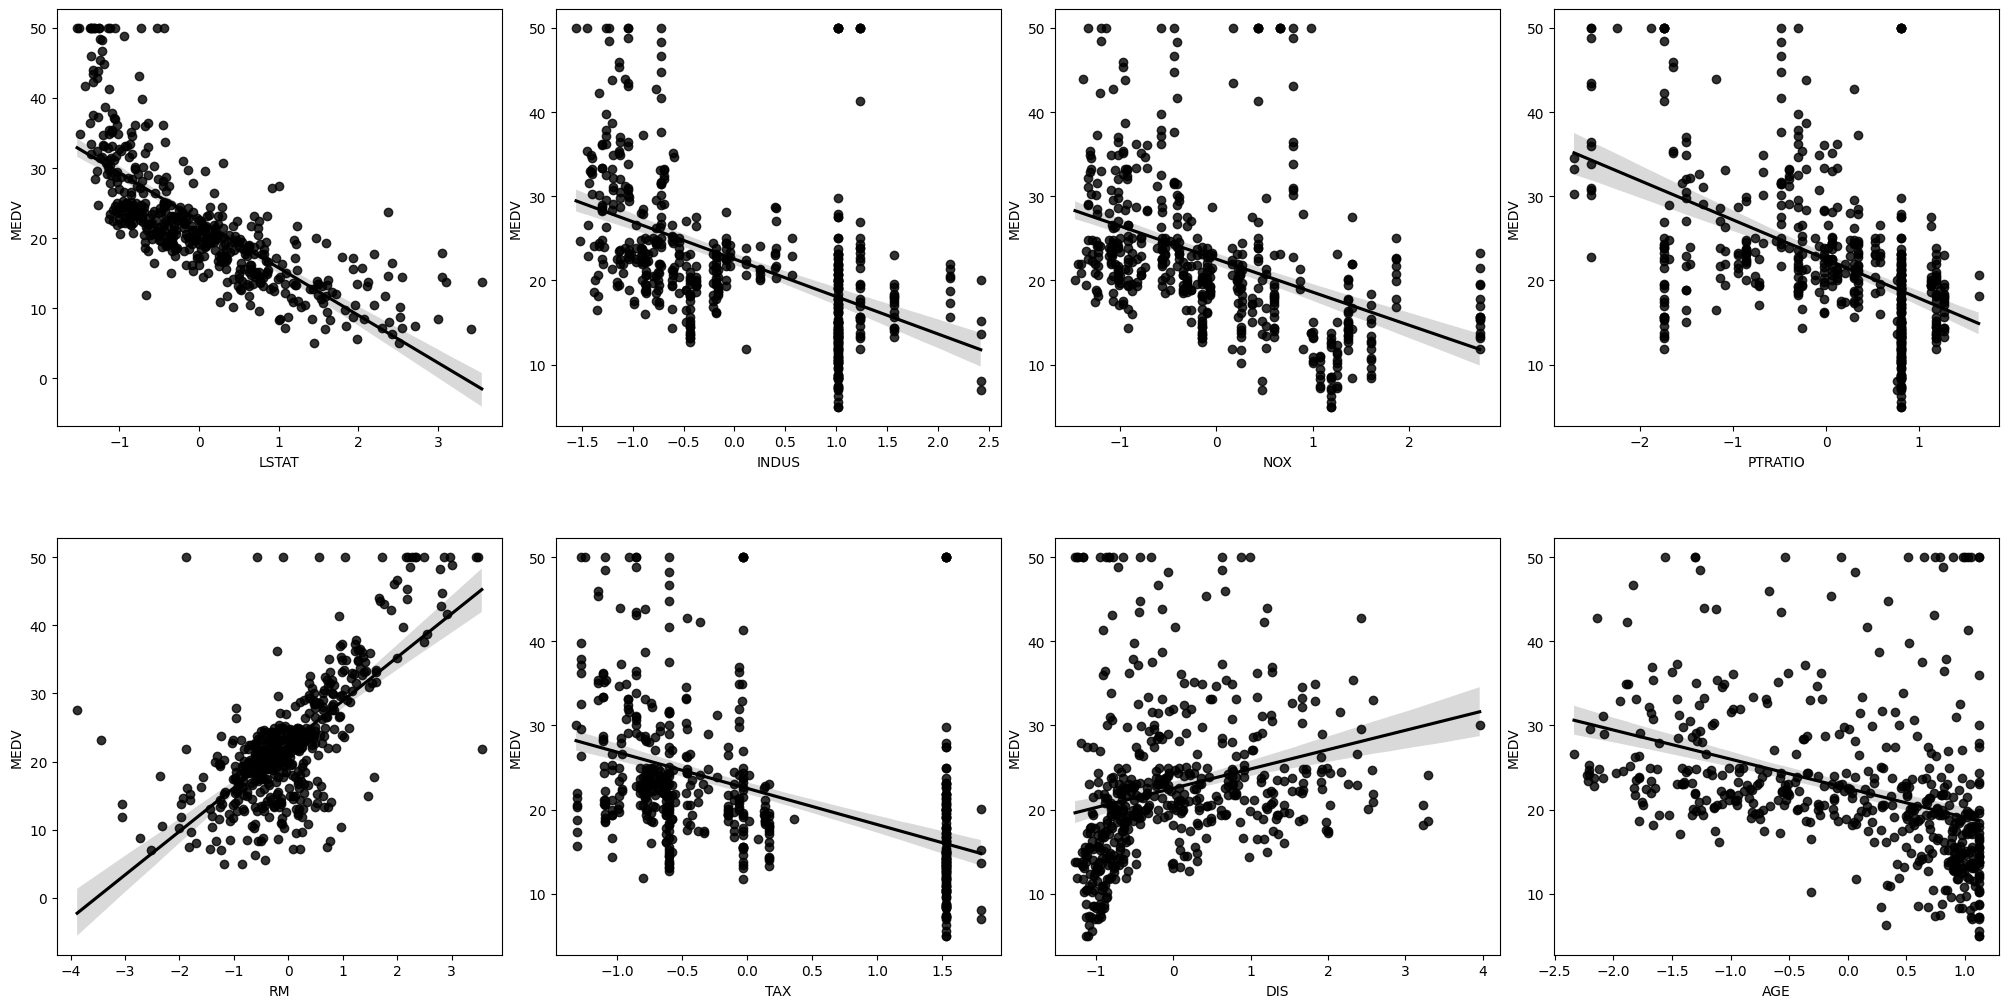

In [10]:
xfig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y = y, x = x[k], ax = axs[i], color = 'black')
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [11]:
p_n = 100
keep_val = np.arange(start = 0.1, stop = 0.99, step = 0.01)
best_keep, lowest_MSE, arr_ret = techniques.grid_searchCV_pruning(xin = np.array(x), yin = np.array(y), p = p_n, keep_rate = keep_val, CV_groups = 20, classification = False)

The model with lowest MSE is : 101.84814132072297
The model parameters with lowest MSE is using keep_rate : 0.9799999999999995


ValueError: x and y must have same first dimension, but have shapes (5,) and (89,)

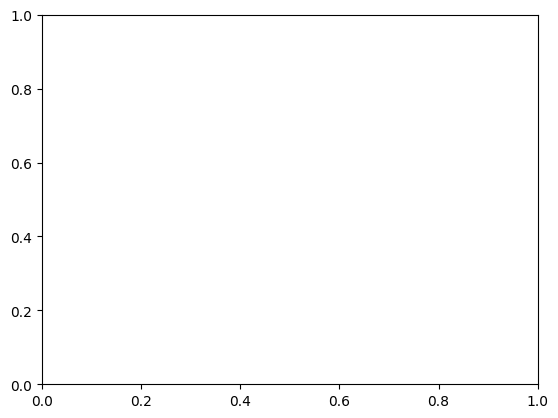

In [12]:
x_plot = np.arange(start = 0.5, stop = keep_val[keep_val.shape[0] -1] + 0.01, step = 0.1)
plt.plot(x_plot, arr_ret, color = 'black', label = 'MSE vs keep_rate')
plt.title('MSE vs keep_rate')
plt.xlabel('keep_rate')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
ret = techniques.train_ELM_PRUNING(xin = np.array(x), yin = np.array(y), p = p_n, control = True, keep_rate = best_keep)
best_w = ret[0]
best_h = ret[1]
best_z = ret[2]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(x), np.array(y), random_state = 0, train_size = 0.8)

In [ ]:
y_pred = techniques.test_ELM(xin = X_test, Z = best_z, W = best_w, control = True, classification = False).reshape(-1,)

In [ ]:
np.array(y_test).shape, y_pred.shape

In [ ]:
print(f"{np.array(y_test)}")

In [ ]:
print(f"{y_pred}")